# **Make an Interactive Plot of the Periodic Table Using Bokeh**

Jiaxin Fan

jiaxin.fan1@unsw.edu.au

*School of Materials Science and Engineering, UNSW*

*Materials and Manufacturing Futures Institue, UNSW*

September, 2021

reference: https://docs.bokeh.org/en/latest/docs/gallery/periodic.html

updated James Cleaver to add Actinides and Lanthanides

In this tutorial, I will demonstrate how to plot an interactive periodic table with easily customisable features using Bokeh and Pandas. After going through the notebook, you will learn:
1. (Recap) the basics of Pandas package which include data input and simple analysis;
2. Create Figure in Bokeh and construct the basic rectangular glyph.
3. Design Tooltip and embed into your plot

# **Two ways of importing elements data**
## 1. Read directly from the *.csv* file using pandas

In [1]:
import pandas as pd

df_1 = pd.read_csv("elements.csv")  # Directly read csv file into a Pandas DataFrame
df_1

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,...,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,NaN,120.0,...,-73.0,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,NaN,32.0,NaN,140.0,...,0.0,gas,atomic,NaN,4.0,0.00000,noble gas,1868,18,1
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,...,-60.0,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,...,0.0,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,...,-27.0,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,[289],#FF1493,[Rn].5f14.6d10.7s2.7p2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,metal,1998,14,7
114,115,Mc,Moscovium,[288],#FF1493,[Rn].5f14.6d10.7s2.7p3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,metal,2003,15,7
115,116,Lv,Livermorium,[293],#FF1493,[Rn].5f14.6d10.7s2.7p4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,metal,2000,16,7
116,117,Ts,Tennessine,[294],#FF1493,[Rn].5f14.6d10.7s2.7p5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,halogen,2010,17,7


## 2. Using python *import* syntax

In [2]:
from bokeh.sampledata.periodic_table import elements  # import "elements" module

df_2 = elements

Compare these two datasets

In [3]:
print("df_1 type: {}\ndf_2 type: {}\nSame data? {}".format(type(df_1), type(df_2),df_1.equals(df_2)))

df_1 type: <class 'pandas.core.frame.DataFrame'>
df_2 type: <class 'pandas.core.frame.DataFrame'>
Same data? False


# Organise data in DataFrame

In [4]:
df = df_1 # Rename the dataframe
print(df.dtypes) # check data type for each column
print("="*50)
print(df["atomic number"]) # select the data in the column named as "atomic number"
print("="*50)
print(df.symbol) # select the data in the column of "symbol"

atomic number                 int64
symbol                       object
name                         object
atomic mass                  object
CPK                          object
electronic configuration     object
electronegativity           float64
atomic radius               float64
ion radius                   object
van der Waals radius        float64
IE-1                        float64
EA                          float64
standard state               object
bonding type                 object
melting point               float64
boiling point               float64
density                     float64
metal                        object
year discovered              object
group                        object
period                        int64
dtype: object
0        1
1        2
2        3
3        4
4        5
      ... 
113    114
114    115
115    116
116    117
117    118
Name: atomic number, Length: 118, dtype: int64
0       H
1      He
2      Li
3      Be
4       B
       ..
11

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
df

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,IE-1,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,NaN,120.0,1312.0,-73.0,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,NaN,32.0,NaN,140.0,2372.0,0.0,gas,atomic,NaN,4.0,0.00000,noble gas,1868,18,1
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,520.0,-60.0,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,900.0,0.0,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,801.0,-27.0,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2
5,6,C,Carbon,12.0107,#909090,[He] 2s2 2p2,2.55,77.0,16 (+4),170.0,1087.0,-154.0,solid,covalent network,3823.0,4300.0,2.26000,nonmetal,Ancient,14,2
6,7,N,Nitrogen,14.0067,#3050F8,[He] 2s2 2p3,3.04,75.0,146 (-3),155.0,1402.0,-7.0,gas,diatomic,63.0,77.0,0.00000,nonmetal,1772,15,2
7,8,O,Oxygen,15.9994,#FF0D0D,[He] 2s2 2p4,3.44,73.0,140 (-2),152.0,1314.0,-141.0,gas,diatomic,55.0,90.0,0.00000,nonmetal,1774,16,2
8,9,F,Fluorine,18.9984032,#90E050,[He] 2s2 2p5,3.98,71.0,133 (-1),147.0,1681.0,-328.0,gas,atomic,54.0,85.0,0.00000,halogen,1670,17,2
9,10,Ne,Neon,20.1797,#B3E3F5,[He] 2s2 2p6,NaN,69.0,NaN,154.0,2081.0,0.0,gas,atomic,25.0,27.0,0.00000,noble gas,1898,18,2


In [6]:
# Define periods and groups that will be displayed in our plot
periods = ["I", "II", "III", "IV", "V", "VI", "VII"]
groups = [str(x) for x in range(1, 19)]

la_periods =["VI"]
la_groups = [str(x) for x in range(57, 72)]

ac_periods =["VII"]
ac_groups = [str(x) for x in range(89, 104)]

# Rearrage and filter out data
df["atomic mass"] = df["atomic mass"].astype(str)
df["group"] = df["group"].astype(str)
df["period"] = [periods[x-1] for x in df.period]

# Filter the DataFrame to include only lanthanoids and the element "Lu"
lanthanide_df = df[(df['metal'] == 'lanthanoid') | (df['symbol'] == 'Lu')]

# Extract the symbols to create the lanthanide_groups list
lanthanide_groups = lanthanide_df['symbol'].tolist()

# Filter the DataFrame to include only actinoid and the element "Lu"
actinide_df = df[(df['metal'] == 'actinoid') | (df['symbol'] == 'Lr')]

# Extract the symbols to create the lanthanide_groups list
actinide_groups = actinide_df['symbol'].tolist()

lanthanide_df['atomic_number_str'] = lanthanide_df['atomic number'].astype(str)
actinide_df['atomic_number_str'] = actinide_df['atomic number'].astype(str)


df = df[df.group != "-"]
df = df[df.symbol != "Lr"] # exclude Lawrencium and Lutetium from your dataset
df = df[df.symbol != "Lu"]

C:\Users\702897616\AppData\Local\Temp\ipykernel_16684\799860126.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lanthanide_df['atomic_number_str'] = lanthanide_df['atomic number'].astype(str)
C:\Users\702897616\AppData\Local\Temp\ipykernel_16684\799860126.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actinide_df['atomic_number_str'] = actinide_df['atomic number'].astype(str)


Check updated dataset

In [7]:
actinide_df

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,IE-1,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period,atomic_number_str
88,89,Ac,Actinium,[227],#70ABFA,[Rn] 6d1 7s2,1.10,NaN,112 (+3),NaN,499.0,NaN,solid,metallic,1323.0,3473.0,10.07,actinoid,1899,-,VII,89
89,90,Th,Thorium,232.03806,#00BAFF,[Rn] 6d2 7s2,1.30,NaN,94 (+4),NaN,587.0,NaN,solid,metallic,2023.0,5093.0,11.72,actinoid,1828,-,VII,90
90,91,Pa,Protactinium,231.03588,#00A1FF,[Rn] 5f2 6d1 7s2,1.50,NaN,104 (+3),NaN,568.0,NaN,solid,metallic,1845.0,4273.0,15.37,actinoid,1913,-,VII,91
91,92,U,Uranium,238.02891,#008FFF,[Rn] 5f3 6d1 7s2,1.38,NaN,102.5 (+3),186.0,598.0,NaN,solid,metallic,1408.0,4200.0,19.05,actinoid,1789,-,VII,92
92,93,Np,Neptunium,[237],#0080FF,[Rn] 5f4 6d1 7s2,1.36,NaN,110 (+2),NaN,605.0,NaN,solid,metallic,917.0,4273.0,20.45,actinoid,1940,-,VII,93
93,94,Pu,Plutonium,[244],#006BFF,[Rn] 5f6 7s2,1.28,NaN,100 (+3),NaN,585.0,NaN,solid,metallic,913.0,3503.0,19.82,actinoid,1940,-,VII,94
94,95,Am,Americium,[243],#545CF2,[Rn] 5f7 7s2,1.30,NaN,126 (+2),NaN,578.0,NaN,solid,metallic,1449.0,2284.0,13.67,actinoid,1944,-,VII,95
95,96,Cm,Curium,[247],#785CE3,[Rn] 5f7 6d1 7s2,1.30,NaN,97 (+3),NaN,581.0,NaN,solid,metallic,1618.0,3383.0,13.51,actinoid,1944,-,VII,96
96,97,Bk,Berkelium,[247],#8A4FE3,[Rn] 5f9 7s2,1.30,NaN,96 (+3),NaN,601.0,NaN,solid,metallic,1323.0,NaN,14.78,actinoid,1949,-,VII,97
97,98,Cf,Californium,[251],#A136D4,[Rn] 5f10 7s2,1.30,NaN,95 (+3),NaN,608.0,NaN,solid,metallic,1173.0,NaN,15.10,actinoid,1950,-,VII,98


# Specify color map and tooltips

In [8]:
cmap = {
    "alkali metal"         : "#a6cee3",
    "alkaline earth metal" : "#1f78b4",
    "metal"                : "#d93b43",
    "halogen"              : "#999d9a",
    "metalloid"            : "#e08d49",
    "noble gas"            : "#eaeaea",
    "nonmetal"             : "#f1d4Af",
    "transition metal"     : "#599d7A",
    "lanthanoid"           : "#9e0142",  # Choose a color for lanthanoids
    "actinoid"             : "#5e4fa2"   # Choose a color for actinoids
}

# TOOLTIPS (list) will be used to organise the information displayed in the HoverTool.
# it is provided as a list of (label, value) tuples.
TOOLTIPS = [
    ("Name", "@name"),                        # Field names that begin with @ are associated with columns in a ColumnDataSource.
    ("Atomic number", "@{atomic number}"),
    ("Atomic mass", "@{atomic mass}"),
    ("Type", "@metal"),
    #("CPK color", "$color[hex, swatch]:CPK"), # Field names that begin with $ are “special fields”.
    ("Electronic configuration", "@{electronic configuration}"),
    ("Bonding Type", "@{bonding type}"),
    ("van der Waals radius", "@{van der Waals radius}")
]

# Plot configurations

Create *figure* object and specify input parameters.

In [9]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.transform import dodge, factor_cmap
from bokeh.layouts import row, column

output_notebook()  # enable plotting in Jupyter notebook

# Main plot for the Periodic Table (omitting LA and AC Series)
p1 = figure(title="Periodic Table ",
            width=1000, height=750,
            x_range=groups, y_range=list(reversed(periods)),
            tools="hover",
            toolbar_location=None,
            tooltips=TOOLTIPS)

# Plot for the Lanthanides
p2 = figure(title="Lanthanides",
            width=850, height=150,  # Adjust the height as needed
            x_range=la_groups, y_range=list(reversed(la_periods)),  # Define the x_range for Lanthanides
            tools="hover",
            toolbar_location=None,
            tooltips=TOOLTIPS)

# Plot for the Actinides
p3 = figure(title="Actinides",
            width=850, height=150,  # Adjust the height as needed
            x_range=ac_groups, y_range=list(reversed(ac_periods)),  # Define the x_range for Actinides
            tools="hover",
            toolbar_location=None,
            tooltips=TOOLTIPS)

# Arrange the plots in a grid layout
# Create an empty plot to use as a spacer
spacer = figure(width=100, height=75, toolbar_location=None, outline_line_color=None)
spacer.grid.visible = False
spacer.axis.visible = False

# Calculate the width of the widest plot
max_width = max(p1.width, p2.width, p3.width)

# Set the width of the spacers to center the plots
spacer_width = int((max_width - p1.width) / 2)
spacer1 = figure(width=spacer_width, height=100, toolbar_location=None, outline_line_color=None)
spacer1.grid.visible = False
spacer1.axis.visible = False

spacer_width = int((max_width - p2.width) / 2)
spacer2R = figure(width=spacer_width, height=100, toolbar_location=None, outline_line_color=None)
spacer2R.grid.visible = False
spacer2R.axis.visible = False
spacer2L = figure(width=spacer_width, height=100, toolbar_location=None, outline_line_color=None)
spacer2L.grid.visible = False
spacer2L.axis.visible = False


spacer_width = int((max_width - p3.width) / 2)
spacer3R = figure(width=spacer_width, height=100, toolbar_location=None, outline_line_color=None)
spacer3R.grid.visible = False
spacer3R.axis.visible = False
spacer3L = figure(width=spacer_width, height=100, toolbar_location=None, outline_line_color=None)
spacer3L.grid.visible = False
spacer3L.axis.visible = False

# Arrange the plots in a grid layout with spacers for center alignment
layout = column(
    p1,
    spacer,
    row(spacer2L, p2, spacer2R),
    row(spacer3L, p3, spacer3R)
)

# Show the layout
show(layout)


print(spacer_width)

Loading BokehJS ...

75


Create rect() for each element

In [10]:
r = p1.rect("group", "period",                # x and y values
           0.95, 0.95,                       # size of the rectangles
           source=df,                        # a user-supplied data source
           fill_alpha=0.6,                   # opacity - value from 0 (fully transparent) to 1 (fully opaque)
           color=factor_cmap('metal',        # field_name
                             palette=list(cmap.values()), # a list of colors to use for colormapping
                             factors=list(cmap.keys())    # a sequences of categorical factors corresponding to the palette
                            )
          )


# Use lanthanide_df and actinoid_df as data sources for p2 and p3
r2 = p2.rect("atomic_number_str", "period",
             0.95, 0.95,
             source=lanthanide_df,
             fill_alpha=0.6,
             color=factor_cmap('metal', palette=list(cmap.values()), factors=list(cmap.keys())))

r3 = p3.rect("atomic_number_str", "period",
             0.95, 0.95,
             source=actinide_df,
             fill_alpha=0.6,
             color=factor_cmap('metal', palette=list(cmap.values()), factors=list(cmap.keys())))


# Show the layout
show(layout)

In [11]:
actinide_df['atomic_number_str']

88      89
89      90
90      91
91      92
92      93
93      94
94      95
95      96
96      97
97      98
98      99
99     100
100    101
101    102
102    103
Name: atomic_number_str, dtype: object

Fill in information sourced from the element dataframe

In [12]:
text_props1 = {"source": df, "text_align": "left", "text_baseline": "middle"} # define generic text properties
text_props2 = {"source": lanthanide_df, "text_align": "left", "text_baseline": "middle"} # define generic text properties
text_props3 = {"source": actinide_df, "text_align": "left", "text_baseline": "middle"} # define generic text properties

x1 = dodge("group", -0.4, range=p1.x_range) # use the dodge() function to provide an offset for each call
x2 = dodge("atomic_number_str", -0.4, range=p2.x_range) # use the dodge() function to provide an offset for each call
x3 = dodge("atomic_number_str", -0.4, range=p3.x_range) # use the dodge() function to provide an offset for each call

In [13]:
p1.text(x=x1, y="period", text="symbol", text_font_style="bold", **text_props1) # use ** to unpack the text dictionary
p2.text(x=x2, y="period", text="symbol", text_font_style="bold", **text_props2) # use ** to unpack the text dictionary
p3.text(x=x3, y="period", text="symbol", text_font_style="bold", **text_props3) # use ** to unpack the text dictionary
show(layout)

Finish up the rest of the text

In [14]:
p1.text(x=x1, y=dodge("period", 0.3, range=p1.y_range), text="atomic number",
       text_font_size="11px", **text_props1)

p1.text(x=x1, y=dodge("period", -0.35, range=p1.y_range), text="name",
       text_font_size="7px", **text_props1)

p1.text(x=x1, y=dodge("period", -0.2, range=p1.y_range), text="atomic mass",
       text_font_size="7px", **text_props1)

p1.text(x=["3", "3"], y=["VI", "VII"], text=["LA", "AC"], text_align="center", text_baseline="middle")

p2.text(x=x2, y=dodge("period", 0.3, range=p2.y_range), text="atomic number",
       text_font_size="11px", **text_props2)

p2.text(x=x2, y=dodge("period", -0.35, range=p2.y_range), text="name",
       text_font_size="7px", **text_props2)

p2.text(x=x2, y=dodge("period", -0.2, range=p2.y_range), text="atomic mass",
       text_font_size="7px", **text_props2)

p3.text(x=x3, y=dodge("period", 0.3, range=p3.y_range), text="atomic number",
       text_font_size="11px", **text_props3)

p3.text(x=x3, y=dodge("period", -0.35, range=p3.y_range), text="name",
       text_font_size="7px", **text_props3)

p3.text(x=x3, y=dodge("period", -0.2, range=p3.y_range), text="atomic mass",
       text_font_size="7px", **text_props3)


show(layout)

Tidy up and present the final plot

In [15]:
from bokeh.models import Legend, LegendItem

legend_items = []
for metal, color in cmap.items():
    glyph = p1.rect(x=[0], y=[0], width=0.1, height=0.1, color=color, visible=False)  # Create a small square glyph
    legend_items.append(LegendItem(label=metal, renderers=[glyph]))

# Split the legend items into two groups
half_len = len(legend_items) // 2
legend_items1 = legend_items[:half_len]
legend_items2 = legend_items[half_len:]
# Create two separate legends
legend1 = Legend(items=legend_items1, location="top_center", orientation="horizontal")
legend2 = Legend(items=legend_items2, location="top_center", orientation="horizontal")
legend1.location = (200, 670)  # Adjust the y-coordinate as needed
legend2.location = (200, 630)  # Adjust the y-coordinate as needed


p1.outline_line_color = None
p1.grid.grid_line_color = None
p1.axis.axis_line_color = None
p1.axis.major_tick_line_color = None
p1.axis.major_label_standoff = 0
p1.add_layout(legend1)
p1.add_layout(legend2)
p1.hover.renderers = [r] # only hover element boxes

p2.outline_line_color = None
p2.grid.grid_line_color = None
p2.axis.axis_line_color = None
p2.axis.major_tick_line_color = None
p2.axis.major_label_standoff = 0

p3.outline_line_color = None
p3.grid.grid_line_color = None
p3.axis.axis_line_color = None
p3.axis.major_tick_line_color = None
p3.axis.major_label_standoff = 0

show(layout)

Save plot

In [16]:
from bokeh.io import save

save(layout, filename="periodic_table.html", title="Periodic Table")

C:\Users\702897616\AppData\Local\Temp\ipykernel_16684\3822262662.py:3: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(layout, filename="periodic_table.html", title="Periodic Table")


'C:\\Users\\702897616\\Downloads\\InteractivePlot (2)\\InteractivePlot\\periodic_table.html'

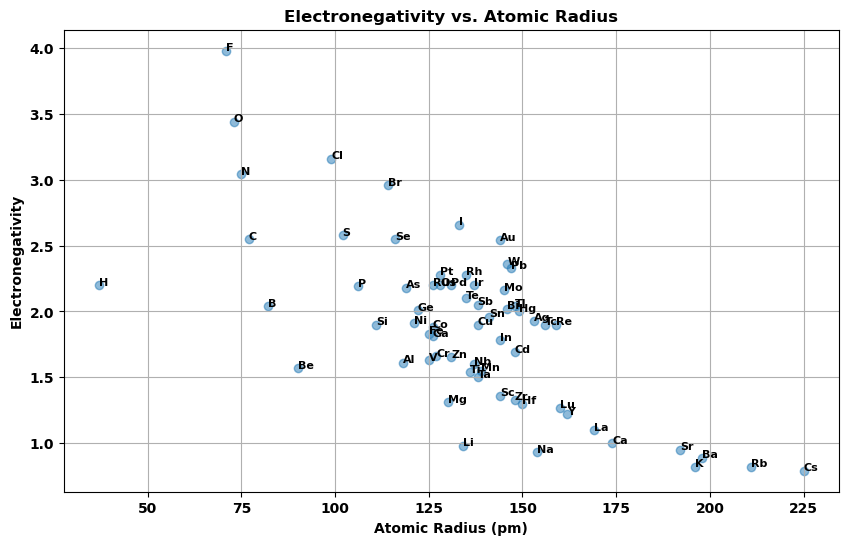

In [17]:
import matplotlib.pyplot as plt
import numpy as np


# Clean the data by removing rows with non-finite values in the 'electronegativity' or 'atomic radius' columns
df_cleaned = df_1.replace([np.inf, -np.inf], np.nan).dropna(subset=['atomic radius', 'electronegativity'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['atomic radius'], df_cleaned['electronegativity'], alpha=0.5)

# Labeling the plot
plt.title('Electronegativity vs. Atomic Radius')
plt.xlabel('Atomic Radius (pm)')
plt.ylabel('Electronegativity')

# Optional: annotate each point with the element symbol
for i, row in df_cleaned.iterrows():
    plt.text(row['atomic radius'], row['electronegativity'], row['symbol'], fontsize=8)

plt.grid(True)
plt.show()


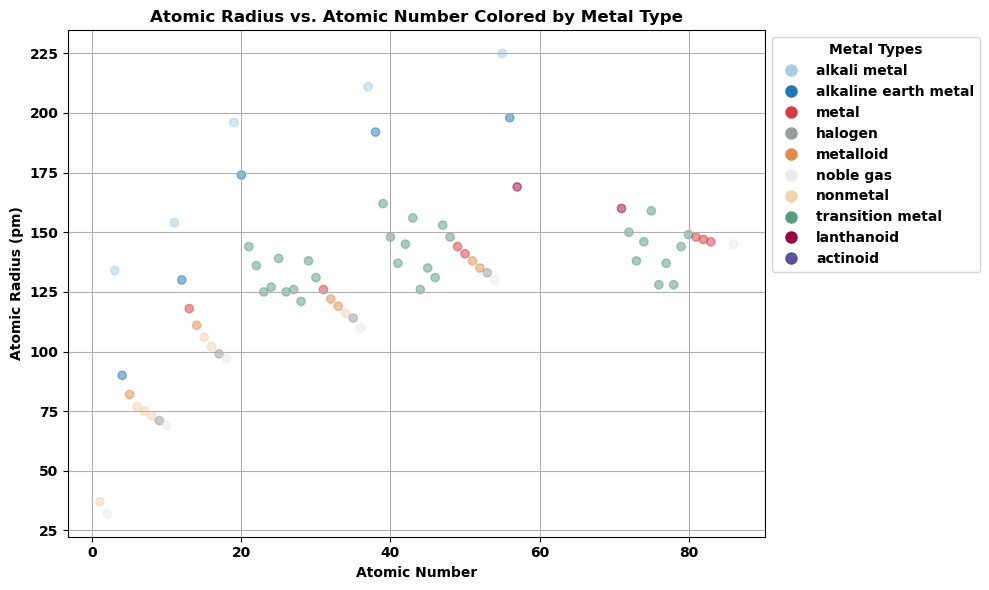

In [18]:
# Assign colors to elements based on the metal type.
colors = df_1['metal'].map(cmap)

# Create the scatter plot.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_1['atomic number'], df_1['atomic radius'], alpha=0.5, c=colors)

# Create a legend.
# We will use a list comprehension to create handles for the legend.
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap[metal], markersize=10) for metal in cmap]
plt.legend(handles, cmap.keys(), title='Metal Types', loc='upper left', bbox_to_anchor=(1, 1))

# Labeling the plot.
plt.title('Atomic Radius vs. Atomic Number Colored by Metal Type')
plt.xlabel('Atomic Number')
plt.ylabel('Atomic Radius (pm)')

plt.tight_layout()
plt.grid(True)
plt.show()

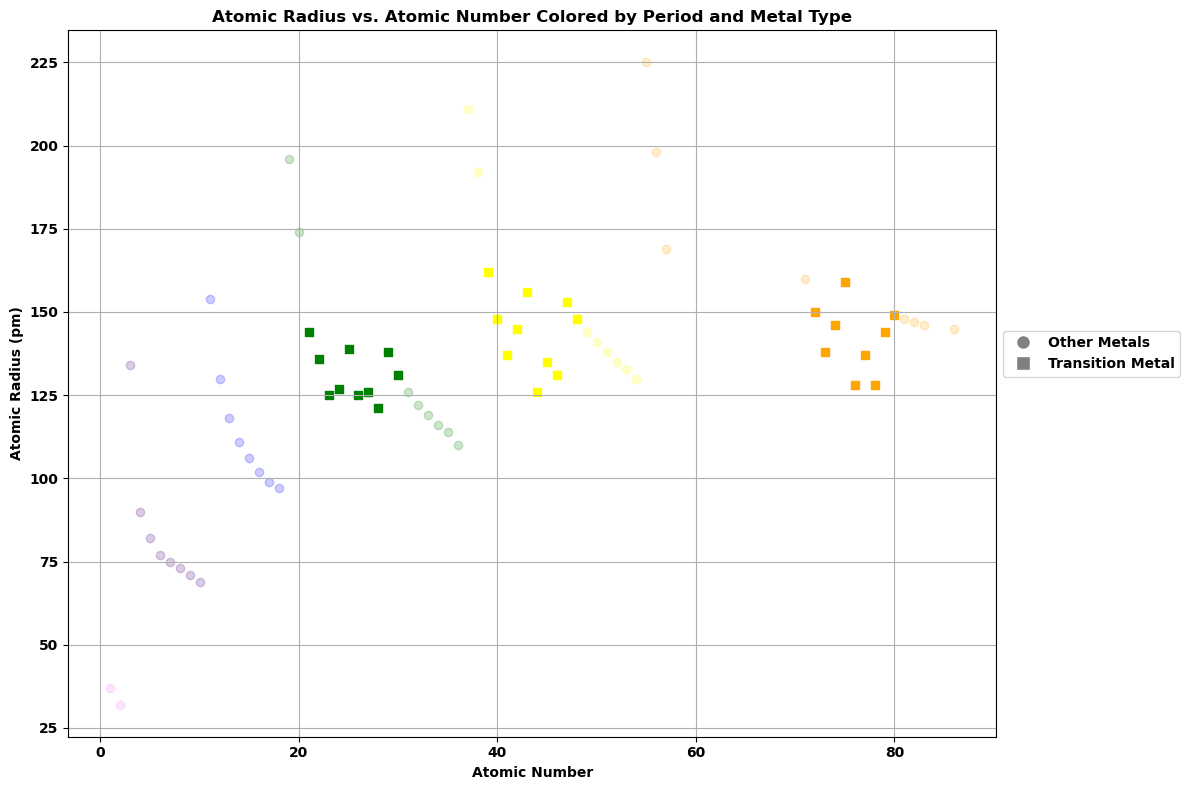

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your DataFrame and it contains 'atomic radius', 'atomic number', 'period', and 'metal' columns.

# Define a color map for periods
period_color_map = {
    "I": "violet",
    "II": "indigo",
    "III": "blue",
    "IV": "green",
    "V": "yellow",
    "VI": "orange",
    "VII": "red",
}

# Create the scatter plot with different markers.
plt.figure(figsize=(12, 8))

for i, row in df_1.iterrows():
    color = period_color_map[row['period']]
    if row['metal'] == 'transition metal':
        marker = 's'  # Square for transition metals
        alpha = 1.0   # Fully opaque for transition metals
    else:
        marker = 'o'  # Circle for other elements
        alpha = 0.2   # Semi-transparent for other elements

    plt.scatter(row['atomic number'], row['atomic radius'], c=color, marker=marker, alpha=alpha)

# Create a legend for the periods.
period_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=period_color_map[period], markersize=10) for period in period_color_map]
plt.legend(period_handles, period_color_map.keys(), title='Period', loc='upper left', bbox_to_anchor=(1, 1))

# Add a custom legend for the marker types.
from matplotlib.lines import Line2D
custom_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label='Other Metals'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='grey', markersize=10, label='Transition Metal'),
]
plt.legend(handles=custom_handles, loc='lower left', bbox_to_anchor=(1, 0.5))

# Title and labels for the plot.
plt.title('Atomic Radius vs. Atomic Number Colored by Period and Metal Type')
plt.xlabel('Atomic Number')
plt.ylabel('Atomic Radius (pm)')

plt.tight_layout()
plt.grid(True)
plt.show()


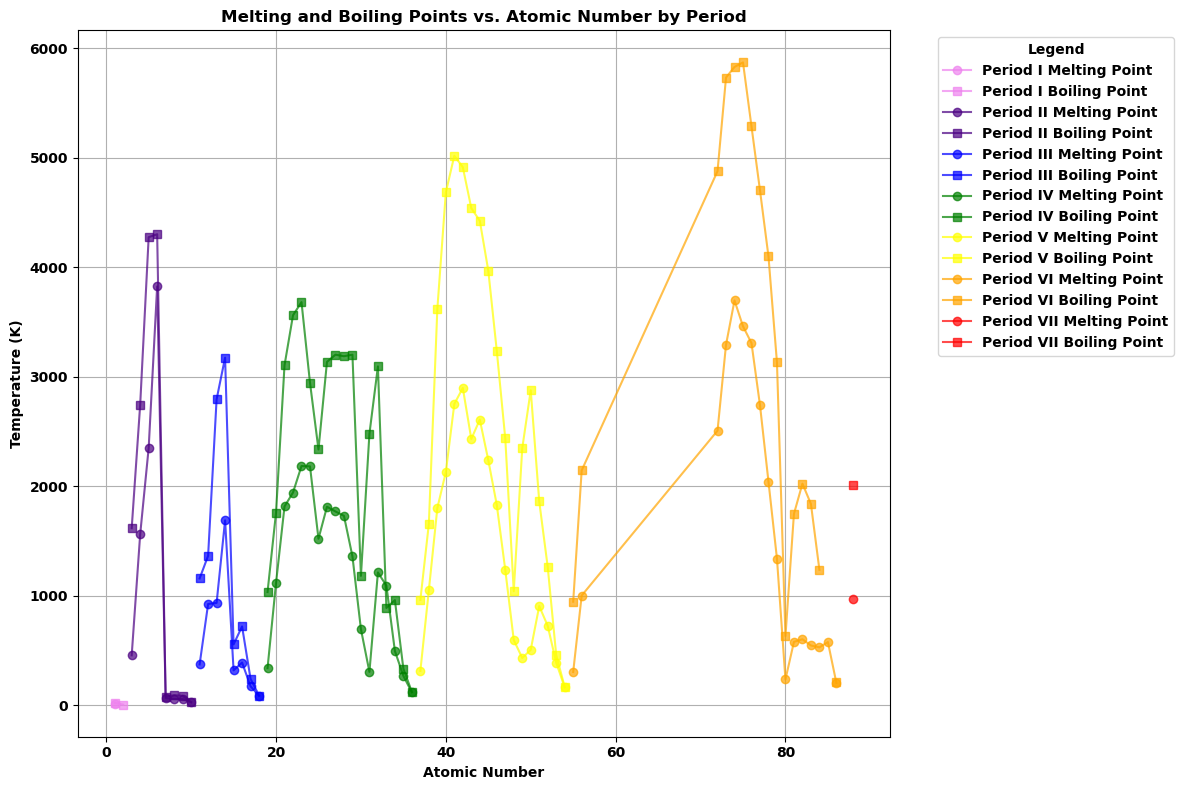

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your DataFrame and it contains 'atomic number', 'melting point', 'boiling point', and 'period' columns.

# Define a color map for periods
period_color_map = {
    "I": "violet",
    "II": "indigo",
    "III": "blue",
    "IV": "green",
    "V": "yellow",
    "VI": "orange",
    "VII": "red",
}

plt.figure(figsize=(12, 8))

# Plot melting and boiling points for each period
for period, group_df in df.groupby('period'):
    plt.plot(group_df['atomic number'], group_df['melting point'], marker='o', linestyle='-', label=f'Period {period} Melting Point', color=period_color_map[period], alpha=0.7)
    plt.plot(group_df['atomic number'], group_df['boiling point'], marker='s', linestyle='-', label=f'Period {period} Boiling Point', color=period_color_map[period], alpha=0.7)

# Labeling the plot
plt.title('Melting and Boiling Points vs. Atomic Number by Period')
plt.xlabel('Atomic Number')
plt.ylabel('Temperature (K)')  # Assuming the temperature is in Kelvin
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()
